In [55]:
import sys
sys.path.append("/root/img_blur/src")
from img_blur_processor import IMGBlurProcessor
import json
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

output_file = "/root/img_blur/ori_pd.pkl"
processor = IMGBlurProcessor()
processor.input_reader()
input_file = "/data_path/2w_lane_day.txt"

TOTAL IAMGE AMOUNT: 0


In [28]:
result_ori = processor.load_from_pickle(output_file)

In [29]:
result_ori

0        0.1481
1        0.1098
2        0.0022
3        0.0894
4        0.0997
          ...  
19895    0.0578
19896    0.1975
19897    0.1541
19898    0.1444
19899    0.0069
Length: 19900, dtype: float64

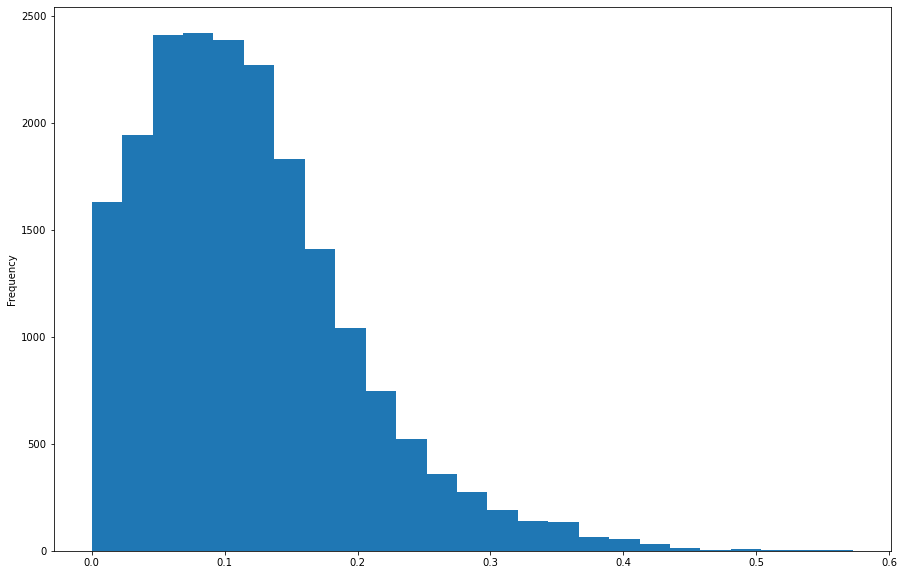

In [30]:
a = result_ori.plot.hist(bins=25, figsize=(15, 10))

In [31]:
result_ori.describe()

count    19900.000000
mean         0.118337
std          0.078981
min          0.000000
25%          0.059400
50%          0.106700
75%          0.160700
max          0.572600
dtype: float64

In [13]:
gen_output_file = "/root/img_blur/gen_pd.pkl"

In [16]:
result_gen = processor.load_from_pickle(gen_output_file)

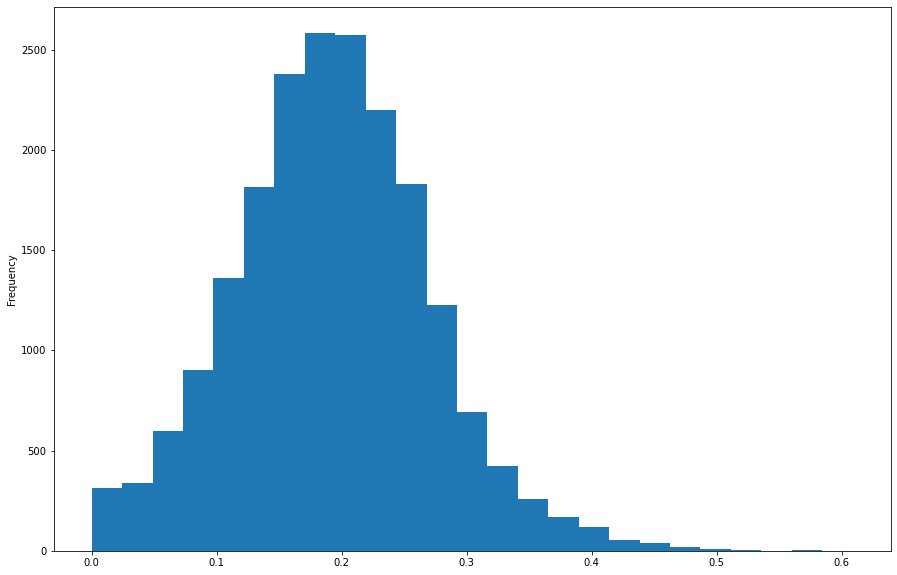

In [17]:
b = result_gen.plot.hist(bins=25, figsize=(15, 10))

In [19]:
result_gen.describe()

count    19900.000000
mean         0.192317
std          0.077976
min          0.000000
25%          0.141900
50%          0.191400
75%          0.241800
max          0.608700
dtype: float64

In [21]:
import seaborn as sns

<class 'matplotlib.axes._subplots.AxesSubplot'>


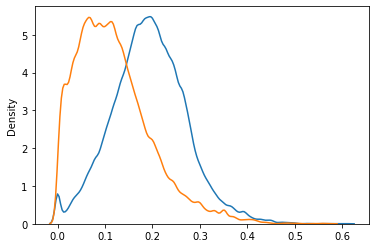

In [50]:
a = sns.kdeplot(result_gen, bw_adjust=.5)
b = sns.kdeplot(result_ori, bw_adjust=.5)
print(type(a))

In [72]:
oris = pd.Series(result_ori, name='Ori')
gens  = pd.Series(result_gen, name='Gen')

df=pd.concat([oris, gens],axis=1)

In [73]:
df

,Ori,Gen
0,0.1481,0.1480
1,0.1098,0.2314
2,0.0022,0.2385
3,0.0894,0.2259
4,0.0997,0.2454
...,...,...
19895,0.0578,0.0000
19896,0.1975,0.0000
19897,0.1541,0.0000
19898,0.1444,0.0000


Text(0.5, 0, 'Ambiguity')

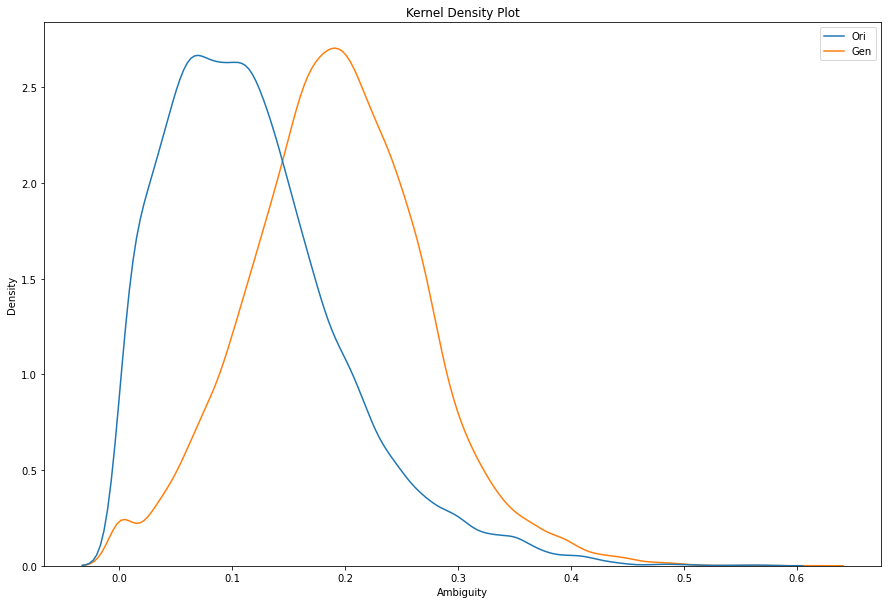

In [79]:
plt.figure(figsize=(15, 10))
sns.kdeplot(data=df[["Ori", "Gen"]], bw_adjust=.5)
plt.title('Kernel Density Plot')
plt.xlabel('Ambiguity')

<AxesSubplot:ylabel='Density'>

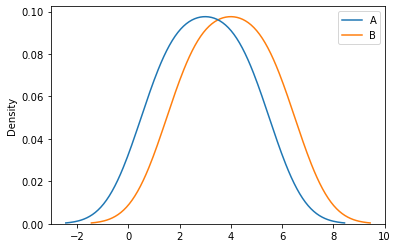

In [67]:
import seaborn as sns
import pandas as pd

# create example dataframe
df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 
                   'B': [3, 4, 2, 5, 6], 
                   'C': [6, 7, 8, 9, 10]})

# plot kernel density for columns A and B with different colors
sns.kdeplot(data=df[['A', 'B']])

In [69]:
df

,A,B,C
0,1,3,6
1,2,4,7
2,3,2,8
3,4,5,9
4,5,6,10
